# Importing the Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
%matplotlib inline
sns.set(style='ticks', font_scale=1.2)

warnings.filterwarnings('ignore')

In [10]:
# Load the dataset from a CSV file
bikes = pd.read_csv("bikes.csv")

In [11]:
bikes.shape

(7857, 8)

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [13]:
bikes.head(10)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25 bhp,63400
6,Bajaj Pulsar 180cc 2016,2016,19718 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,55000
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,\n\n 40 Kmpl,20.21 bhp,120000
8,KTM Duke 390cc 2018,2018,1350 Km,first owner,jaipur,\n\n 25 kmpl,42.90 bhp,198000
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000


# Missing values

In [14]:
pd.DataFrame([bikes.isnull().sum(), bikes.isnull().sum() / bikes.shape[0] * 100], index=['count', '%']).T

,count,%
model_name,0.0,0.000000
model_year,0.0,0.000000
kms_driven,0.0,0.000000
owner,0.0,0.000000
location,19.0,0.241823
mileage,11.0,0.140003
power,31.0,0.394553
price,0.0,0.000000


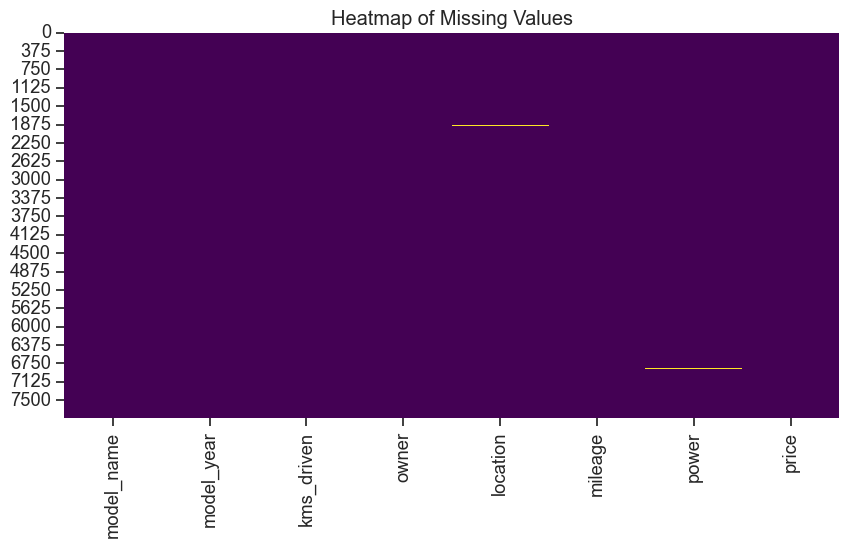

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(bikes.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


# Handle missing values

In [16]:
# Fill 'drive' with mode
if 'drive' in bikes.columns:
    bikes['drive'] = bikes['drive'].fillna(bikes['drive'].mode()[0])


In [17]:
if {'endV', 'brand', 'type', 'drive'}.issubset(bikes.columns):
    bikes['endV'] = bikes['endV'].fillna(
        bikes.groupby(['brand', 'type', 'drive'])['endV'].transform('median')
    )


In [18]:
# Drop rows with remaining NaNs in critical columns
bikes.dropna(subset=['mileage', 'power'], inplace=True)


In [19]:
# Fill missing 'location' values with the most frequent location
bikes['location'] = bikes['location'].fillna(bikes['location'].mode()[0])


In [20]:
# Check if any missing values remain
final_missing = bikes.isnull().sum()

print("\nFinal Missing Values Check:\n")
print(final_missing[final_missing > 0])



Final Missing Values Check:

Series([], dtype: int64)


# Duplicates

In [21]:
# Count duplicate rows
duplicate_count = bikes.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


#  Inconsistent Data

In [22]:
# Check unique values in 'location'
print("Unique locations:\n", bikes['location'].unique())



Unique locations:
 ['hyderabad' 'pondicherry' 'bangalore' 'jaipur' 'chennai' 'ghaziabad'
 'delhi' 'ludhiana' 'jaunpur' 'mumbai' 'chittorgarh' 'thalassery'
 'bathinda' 'gurgaon' 'dehradun' 'pune' 'kukatpally' 'navi mumbai'
 'lucknow' 'siliguri' 'bengaluru' 'rajkot' 'agra' 'bhiwandi' 'patna'
 'udaipur' 'bihar shariff' 'jalandhar' 'vadodara' 'visakhapatnam'
 'thiruvananthapuram' 'ahmedabad' 'bareilly' 'thane' 'kannur' 'surat'
 'kurukshetra' 'moradabad' 'bhagalpur' 'hooghly' 'jhunjhunu' 'kochi'
 'srikakulam' 'jamshedpur' 'hazaribagh' 'noida' 'chandigarh' 'reasi'
 'ambala' 'panchkula' 'balotra' 'sonipat' 'kolkata' 'jind' 'trivandrum'
 'mathura' 'panipat' 'sangli' 'howrah' 'indore' 'pilibhit' 'nagpur'
 'jodhpur' 'alipore' 'secunderabad' 'patiala' 'dhrangadhra' 'avadi'
 'sri ganganagar' 'pali' 'palampur' 'baleshwar' 'kotputli' 'panruti'
 'samana' 'salem' 'meerut' 'gaya' 'vellore' 'guntur' '24 pargana'
 'murshidabad' 'naihati' 'sambalpur' 'tuticorin' 'varanasi' 'panvel'
 'chinchwad' 'mohali' '

In [23]:
# Check unique values in 'owner'
print("\nUnique owners:\n", bikes['owner'].unique())


Unique owners:
 ['first owner' 'third owner' 'second owner' 'fourth owner or more']


In [24]:
# Convert to lowercase and remove extra spaces
bikes['location'] = bikes['location'].str.lower().str.strip()
bikes['owner'] = bikes['owner'].str.lower().str.strip()

In [25]:
# For location

# Manual corrections if needed
bikes['location'] = bikes['location'].replace({
    'delhii': 'delhi',
    'new delhi': 'delhi',
    'bangluru': 'bangalore',
    'blr': 'bangalore'
    # Add other city-specific corrections if found
})



In [26]:
# for owner
bikes['owner'] = bikes['owner'].replace({
    '1st owner': 'first owner',
    'first': 'first owner',
    '2nd owner': 'second owner',
    'second': 'second owner',
    'third': 'third owner',
    '3rd owner': 'third owner',
    'fourth & above owner': 'fourth owner'
})


In [27]:
print("Cleaned location values:\n", bikes['location'].unique())


Cleaned location values:
 ['hyderabad' 'pondicherry' 'bangalore' 'jaipur' 'chennai' 'ghaziabad'
 'delhi' 'ludhiana' 'jaunpur' 'mumbai' 'chittorgarh' 'thalassery'
 'bathinda' 'gurgaon' 'dehradun' 'pune' 'kukatpally' 'navi mumbai'
 'lucknow' 'siliguri' 'bengaluru' 'rajkot' 'agra' 'bhiwandi' 'patna'
 'udaipur' 'bihar shariff' 'jalandhar' 'vadodara' 'visakhapatnam'
 'thiruvananthapuram' 'ahmedabad' 'bareilly' 'thane' 'kannur' 'surat'
 'kurukshetra' 'moradabad' 'bhagalpur' 'hooghly' 'jhunjhunu' 'kochi'
 'srikakulam' 'jamshedpur' 'hazaribagh' 'noida' 'chandigarh' 'reasi'
 'ambala' 'panchkula' 'balotra' 'sonipat' 'kolkata' 'jind' 'trivandrum'
 'mathura' 'panipat' 'sangli' 'howrah' 'indore' 'pilibhit' 'nagpur'
 'jodhpur' 'alipore' 'secunderabad' 'patiala' 'dhrangadhra' 'avadi'
 'sri ganganagar' 'pali' 'palampur' 'baleshwar' 'kotputli' 'panruti'
 'samana' 'salem' 'meerut' 'gaya' 'vellore' 'guntur' '24 pargana'
 'murshidabad' 'naihati' 'sambalpur' 'tuticorin' 'varanasi' 'panvel'
 'chinchwad' 'mo

In [28]:
print("\nCleaned owner values:\n", bikes['owner'].unique())



Cleaned owner values:
 ['first owner' 'third owner' 'second owner' 'fourth owner or more']


# Exploratory Data Analysis (EDA)

In [29]:
# Dataset shape
print("Dataset shape:", bikes.shape)

# Column data types
print("\nData Types:\n", bikes.dtypes)

# Statistical summary
print("\nStatistical Summary:\n", bikes.describe())


Dataset shape: (7815, 8)

Data Types:
 model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

Statistical Summary:
         model_year         price
count  7815.000000  7.815000e+03
mean   2015.406782  1.059191e+05
std       3.851443  1.363158e+05
min    1950.000000  0.000000e+00
25%    2014.000000  4.200000e+04
50%    2016.000000  7.500000e+04
75%    2018.000000  1.250000e+05
max    2021.000000  3.000000e+06


 Descriptive Statistics

In [30]:
# Only numerical columns: include=None by default selects numerical
numerical_summary = bikes.describe()

print("Descriptive Statistics for Numerical Columns:\n")
print(numerical_summary)


Descriptive Statistics for Numerical Columns:

        model_year         price
count  7815.000000  7.815000e+03
mean   2015.406782  1.059191e+05
std       3.851443  1.363158e+05
min    1950.000000  0.000000e+00
25%    2014.000000  4.200000e+04
50%    2016.000000  7.500000e+04
75%    2018.000000  1.250000e+05
max    2021.000000  3.000000e+06


In [31]:
# Custom descriptive stats for selected numerical columns
selected_stats = bikes[['price', 'kms_driven', 'mileage', 'power']].describe()
print("Selected Numerical Summary:\n")
print(selected_stats)


Selected Numerical Summary:

              price
count  7.815000e+03
mean   1.059191e+05
std    1.363158e+05
min    0.000000e+00
25%    4.200000e+04
50%    7.500000e+04
75%    1.250000e+05
max    3.000000e+06


Univariate Analysis

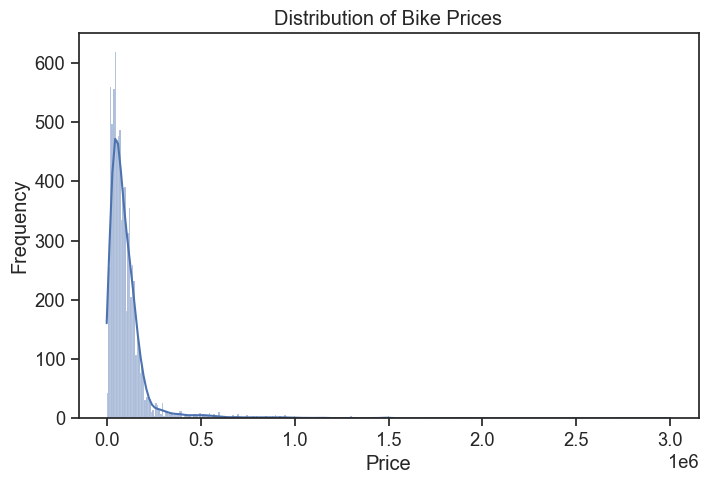

In [32]:
# Distribution of price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(bikes['price'], kde=True)
plt.title("Distribution of Bike Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

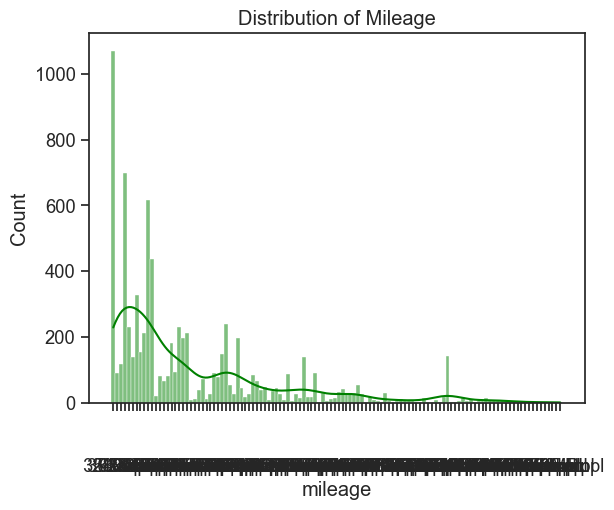

In [33]:
# Distribution of mileage and power
sns.histplot(bikes['mileage'], kde=True, color='green')
plt.title("Distribution of Mileage")
plt.show()


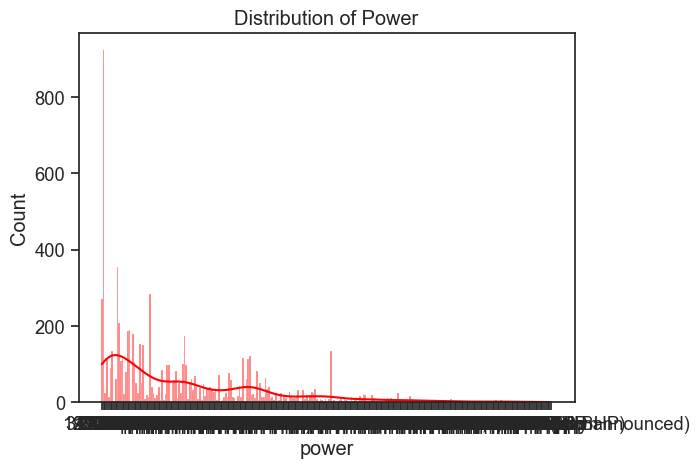

In [34]:
sns.histplot(bikes['power'], kde=True, color='red')
plt.title("Distribution of Power")
plt.show()

Bivariate Analysis

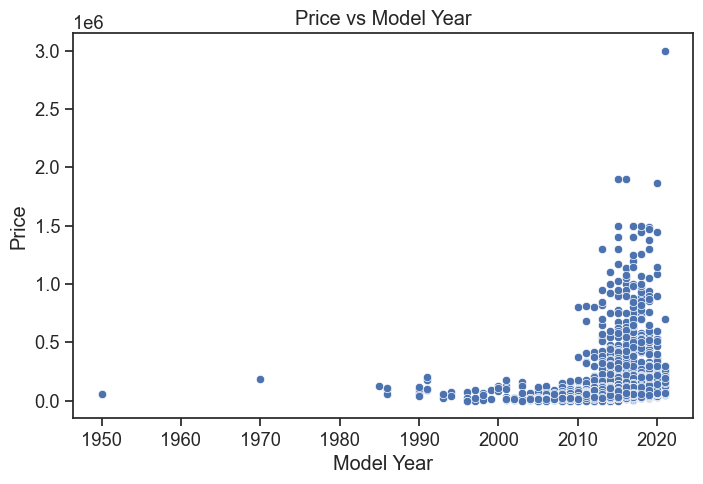

In [35]:
# Price vs. Model Year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='model_year', y='price', data=bikes)
plt.title("Price vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()


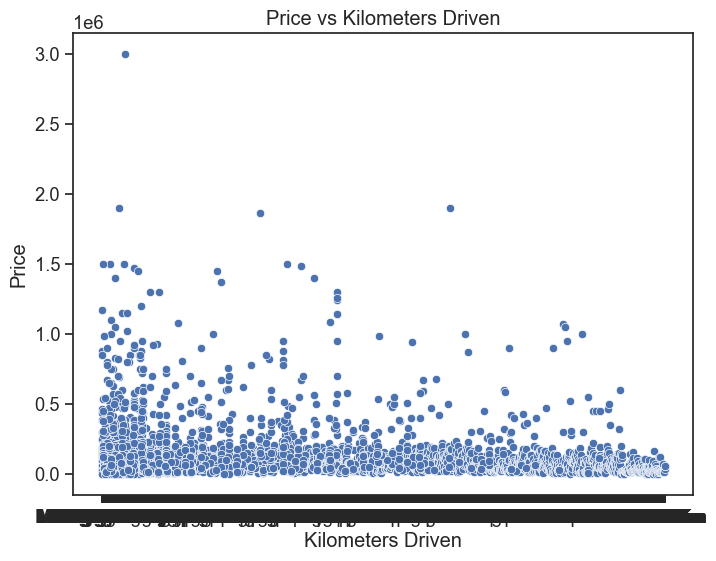

In [36]:
# Price vs. Kilometers Driven
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kms_driven', y='price', data=bikes)
plt.title("Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()


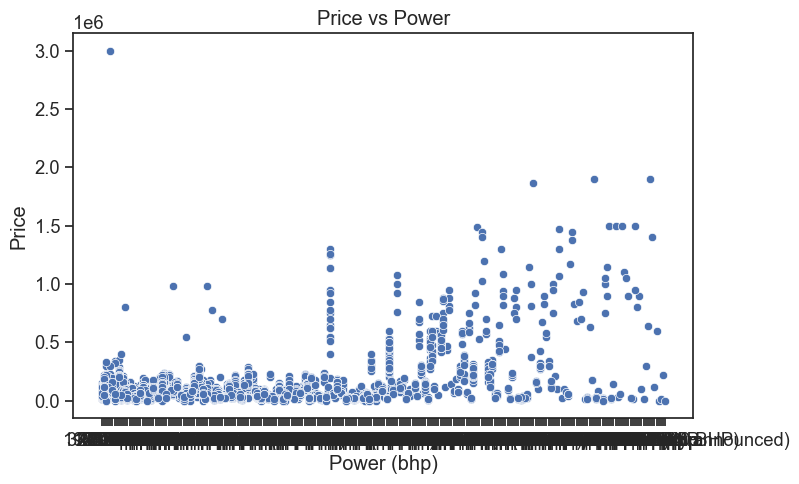

In [37]:
# Price vs. Power
plt.figure(figsize=(8, 5))
sns.scatterplot(x='power', y='price', data=bikes)
plt.title("Price vs Power")
plt.xlabel("Power (bhp)")
plt.ylabel("Price")
plt.show()


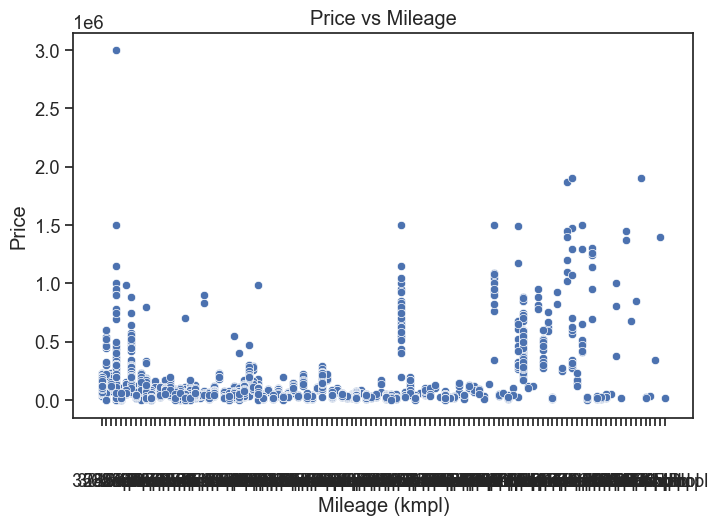

In [38]:
# Price vs. Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='price', data=bikes)
plt.title("Price vs Mileage")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Price")
plt.show()


# Correlation

In [39]:
# Remove ' Km' and commas, convert to float
bikes['kms_driven'] = bikes['kms_driven'].str.replace(' km', '', case=False)
bikes['kms_driven'] = bikes['kms_driven'].str.replace(',', '')
bikes['kms_driven'] = bikes['kms_driven'].str.extract('(\d+\.?\d*)').astype(float)


In [40]:
# Extract numeric part from 'mileage' like "45 kmpl"
bikes['mileage'] = bikes['mileage'].str.extract('(\d+\.?\d*)').astype(float)


In [41]:
# Extract numeric part from 'power' like "12 bhp"
bikes['power'] = bikes['power'].str.extract('(\d+\.?\d*)').astype(float)


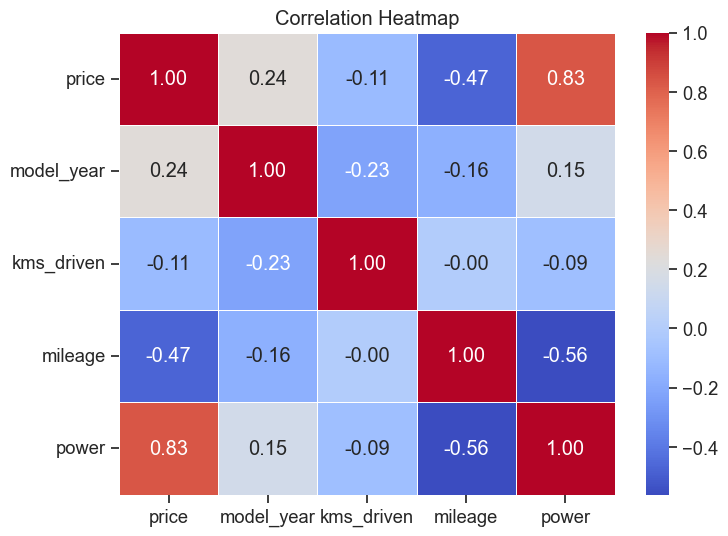

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

numerics = ['price', 'model_year', 'kms_driven', 'mileage', 'power']
correlation_matrix = bikes[numerics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#  Feature Engineering

In [43]:
#Creating New Features
# Age of bike

from datetime import datetime

# Get the current year
current_year = datetime.now().year


In [44]:
# Create new column: AgeOfBike = current year - model year
bikes['AgeOfBike'] = current_year - bikes['model_year']


In [45]:
print(bikes[['model_year', 'AgeOfBike']].head())


   model_year  AgeOfBike
0        2017          8
1        2016          9
2        2012         13
3        2017          8
4        2020          5


In [46]:
# power_to_weight_ratio
# Check if the columns exist
print(bikes.columns)


Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'AgeOfBike'],
      dtype='object')


In [47]:
# Extract numeric value from power like "13.4 bhp"
bikes['power'] = bikes['power'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


In [48]:
# Create 'engine_cc' from 'engV' if needed
if 'mileage' not in bikes.columns and 'mileage' in bikes.columns:
    bikes['mileage'] = bikes['mileage'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


In [49]:
# Create the ratio only where both values are present
bikes['power_to_weight_ratio'] = bikes['power'] / bikes['mileage']


In [50]:
print(bikes[['power', 'mileage', 'power_to_weight_ratio']].head())



   power  mileage  power_to_weight_ratio
0   19.0     35.0               0.542857
1   19.8     35.0               0.565714
2   28.0     30.0               0.933333
3   34.5     28.0               1.232143
4   30.0      NaN                    NaN


In [51]:
bikes.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price', 'AgeOfBike', 'power_to_weight_ratio'],
      dtype='object')

In [52]:
# Encoding location Feature
from sklearn.preprocessing import LabelEncoder

# Create label encoder instance
le = LabelEncoder()

# Apply encoding
bikes['location_encoded'] = le.fit_transform(bikes['location'])

# View mapping
location_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Location Label Encoding Map:\n", location_mapping)


Location Label Encoding Map:
 {'24 pargana': 0, 'abiramam': 1, 'adalaj': 2, 'adilabad': 3, 'adoni': 4, 'adyar': 5, 'agartala': 6, 'agra': 7, 'ahmedabad': 8, 'ahmednagar': 9, 'ajmer': 10, 'ajnala': 11, 'akkalkot': 12, 'akola': 13, 'akot': 14, 'alandur': 15, 'alanganallur': 16, 'alappuzha': 17, 'alibag': 18, 'aliganj': 19, 'aligarh': 20, 'alipore': 21, 'allahabad': 22, 'almora': 23, 'aluva': 24, 'alwar': 25, 'ambala': 26, 'ambejogai': 27, 'ambikapur': 28, 'ambur': 29, 'amethi': 30, 'amila': 31, 'amravati': 32, 'amritsar': 33, 'anand': 34, 'anantapur': 35, 'anantnag': 36, 'anekal': 37, 'angul': 38, 'annigeri': 39, 'aonla': 40, 'aquem': 41, 'areraj': 42, 'arrah': 43, 'asansol': 44, 'ashok nagar': 45, 'assandh': 46, 'auraiya': 47, 'aurangabad': 48, 'avadi': 49, 'ayodhya': 50, 'bagalkot': 51, 'baghpat': 52, 'bagru': 53, 'bahadurgarh': 54, 'bahadurpur': 55, 'balaghat': 56, 'balangir': 57, 'baleshwar': 58, 'baloda': 59, 'balotra': 60, 'bangalore': 61, 'bangarmau': 62, 'banka': 63, 'bankura': 6

In [53]:
# view encoded values
print(bikes[['location', 'location_encoded']].head())


      location  location_encoded
0    hyderabad               236
1    hyderabad               236
2    hyderabad               236
3  pondicherry               424
4    bangalore                61


 Handling Categorical Variables

In [54]:
# Extract brand (assuming first word of model_name is brand)
bikes['brand'] = bikes['model_name'].str.split().str[0]


In [55]:
# Perform one-hot encoding
bikes_encoded = pd.get_dummies(bikes, columns=['brand', 'location', 'owner'], drop_first=True)


In [56]:
print("Encoded columns:\n", bikes_encoded.columns)


Encoded columns:
 Index(['model_name', 'model_year', 'kms_driven', 'mileage', 'power', 'price',
       'AgeOfBike', 'power_to_weight_ratio', 'location_encoded', 'brand_BMW',
       ...
       'location_warangal', 'location_wardha', 'location_washim',
       'location_yamuna nagar', 'location_yanam', 'location_yemmiganur',
       'location_zirakpur', 'owner_fourth owner or more', 'owner_second owner',
       'owner_third owner'],
      dtype='object', length=594)


In [57]:
print("Original shape:", bikes.shape)
print("Encoded shape:", bikes_encoded.shape)


Original shape: (7815, 12)
Encoded shape: (7815, 594)


Feature Transformation

In [58]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# List of numerical features to scale
num_features = ['price', 'kms_driven', 'mileage', 'power']

# Apply scaling
bikes_scaled = bikes.copy()
bikes_scaled[num_features] = scaler.fit_transform(bikes_scaled[num_features])


In [59]:
print(bikes_scaled[num_features].head())


      price  kms_driven   mileage     power
0 -0.311203   -0.008487 -0.577215 -0.116951
1  0.066621    1.224639 -0.577215 -0.063630
2  1.423850   -0.090882 -0.871704  0.482903
3 -0.043425   -0.642687 -0.989500  0.916131
4  0.671872   -0.568999       NaN  0.616204


In [60]:
for col in num_features:
    bikes_scaled[col + '_scaled'] = scaler.fit_transform(bikes[[col]])


Log Transformation

In [61]:
# Checck skewness
print("Skewness before log:")
print(bikes[['price', 'kms_driven', 'mileage', 'power']].skew())


Skewness before log:
price          6.342198
kms_driven    12.099678
mileage        0.669029
power          4.928326
dtype: float64


In [62]:
import numpy as np

# Apply log transformation to skewed features
bikes['price_log'] = np.log1p(bikes['price'])
bikes['kms_driven_log'] = np.log1p(bikes['kms_driven'])
bikes['power_log'] = np.log1p(bikes['power'])
bikes['mileage_log'] = np.log1p(bikes['mileage'])


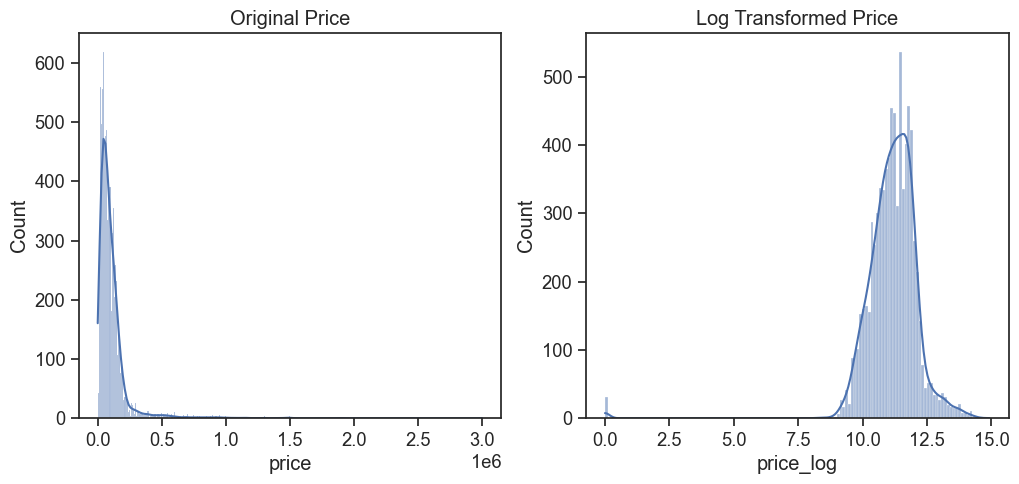

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before and after for price
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(bikes['price'], kde=True, ax=axes[0])
axes[0].set_title('Original Price')

sns.histplot(bikes['price_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Price')

plt.show()


In [64]:
print("Skewness after log:")
print(bikes[['price_log', 'kms_driven_log', 'mileage_log', 'power_log']].skew())


Skewness after log:
price_log        -4.215448
kms_driven_log   -0.800880
mileage_log      -1.264728
power_log         0.781147
dtype: float64


#  Multivariate Plots

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
num_features = ['price', 'model_year', 'kms_driven', 'mileage', 'power', 'AgeOfBike']


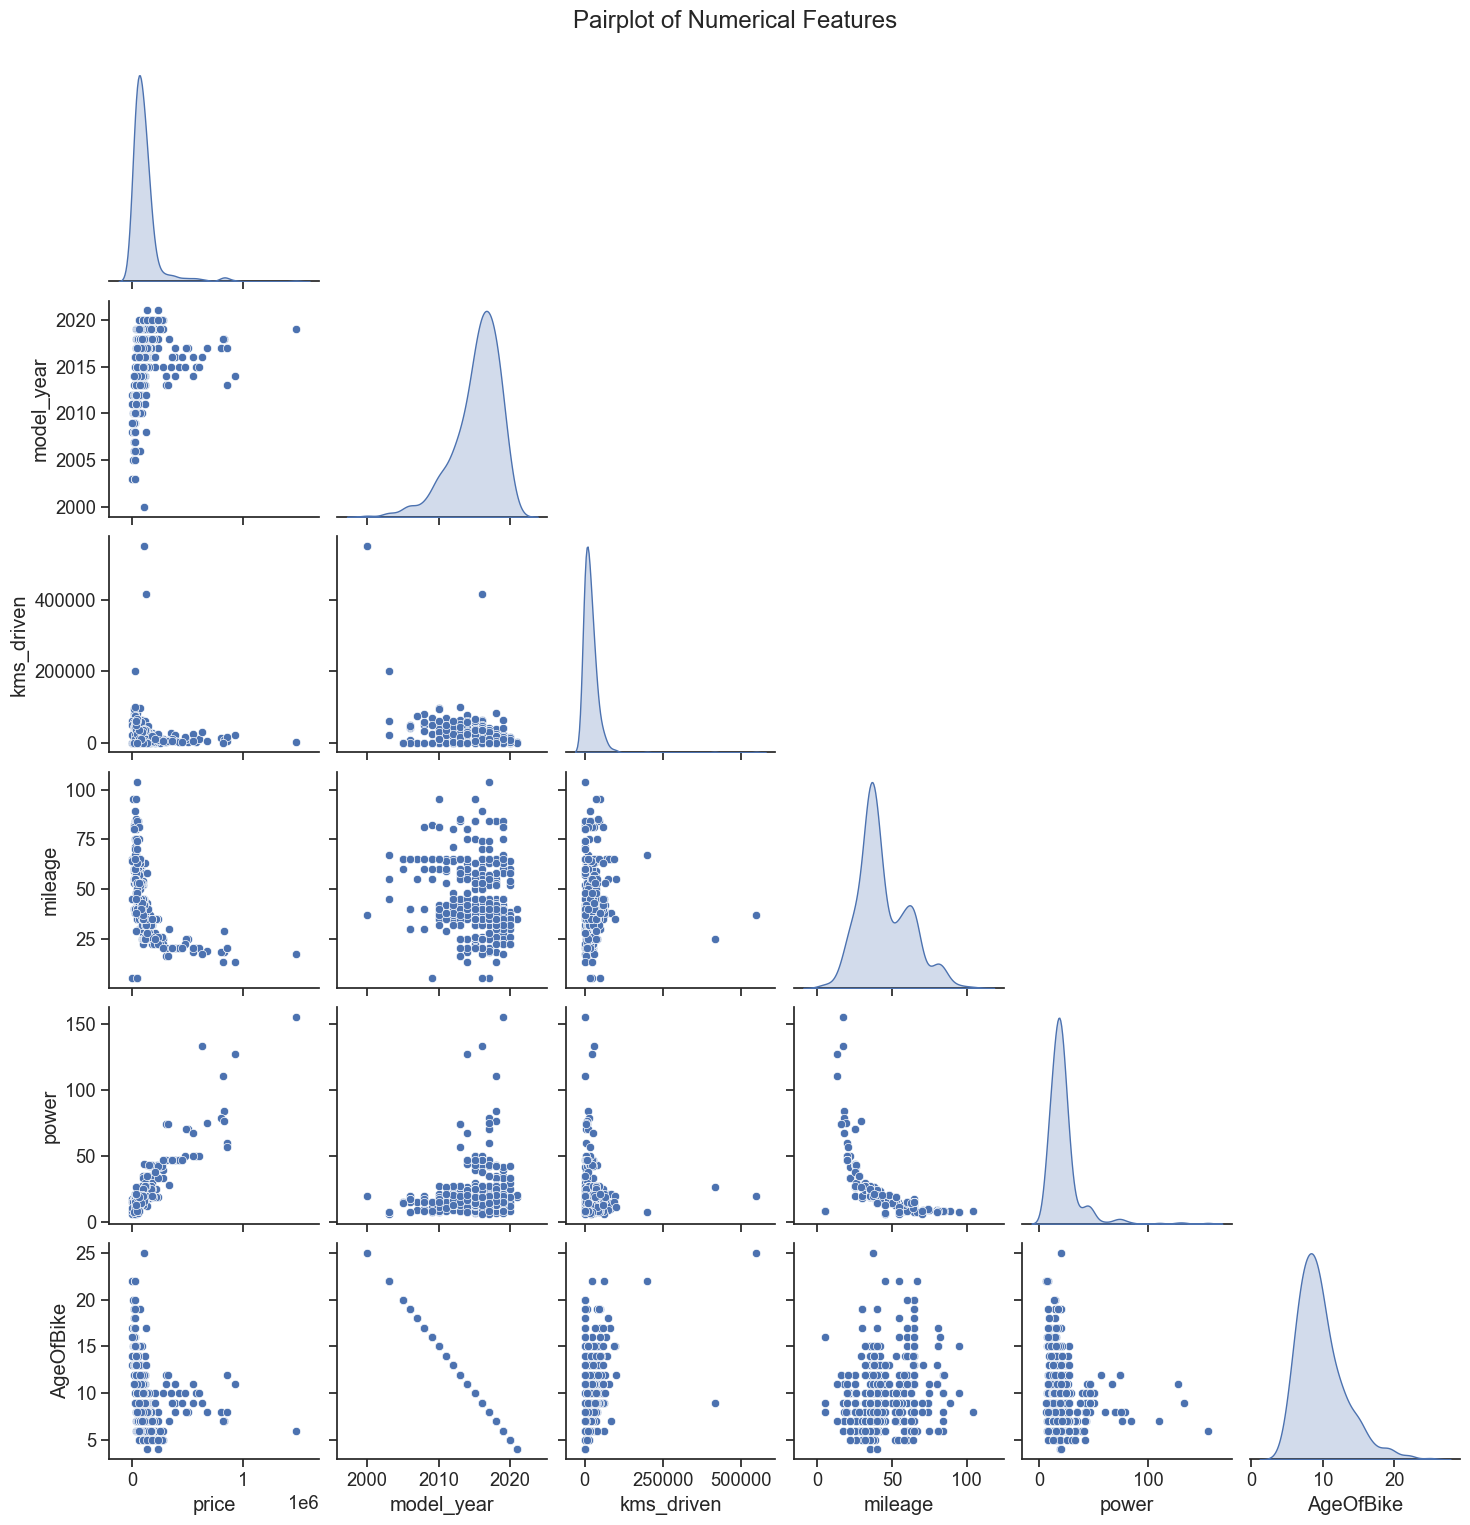

In [66]:
# Optional: reduce data size for faster plotting if dataset is large
sampled_bikes = bikes[num_features].dropna().sample(500, random_state=42)

# Create pairplot
sns.pairplot(sampled_bikes, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [67]:
# Create 'brand' from first word of model_name
bikes['brand'] = bikes['model_name'].str.split().str[0]


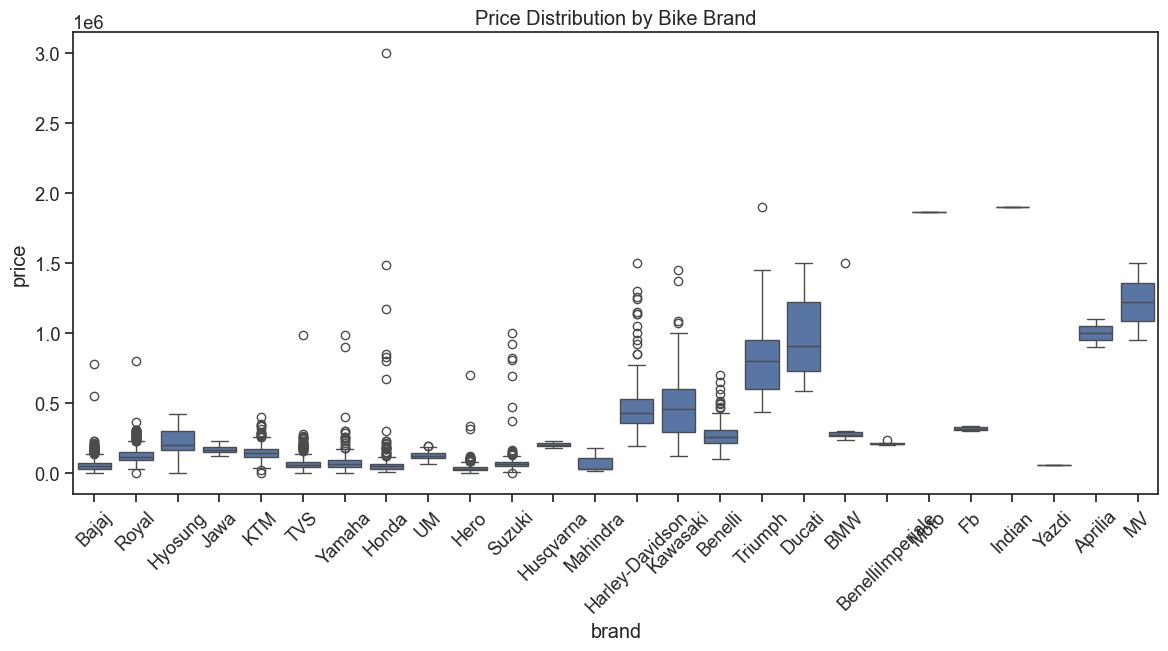

In [68]:
# Price vs Brand
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x='brand', y='price', data=bikes)
plt.title('Price Distribution by Bike Brand')
plt.xticks(rotation=45)
plt.show()


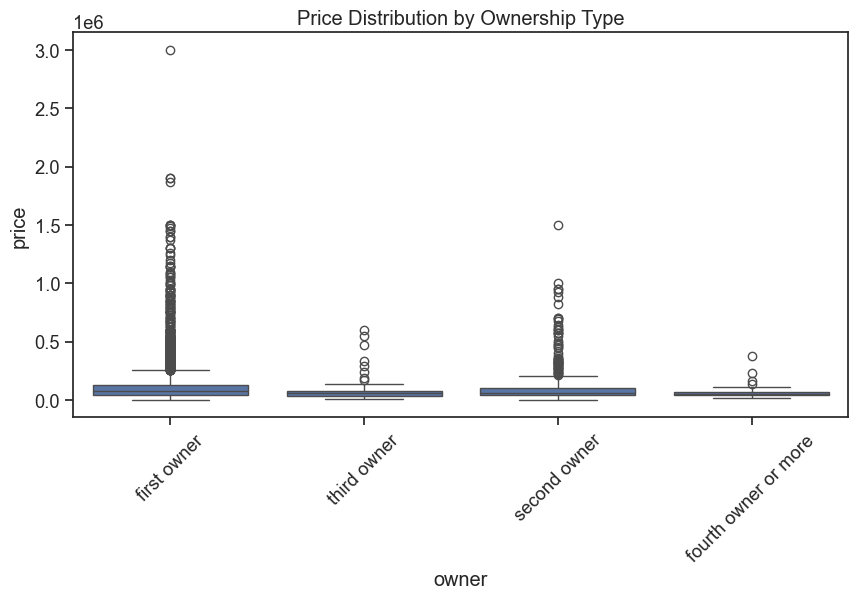

In [69]:
# price vs owner
plt.figure(figsize=(10, 5))
sns.boxplot(x='owner', y='price', data=bikes)
plt.title('Price Distribution by Ownership Type')
plt.xticks(rotation=45)
plt.show()


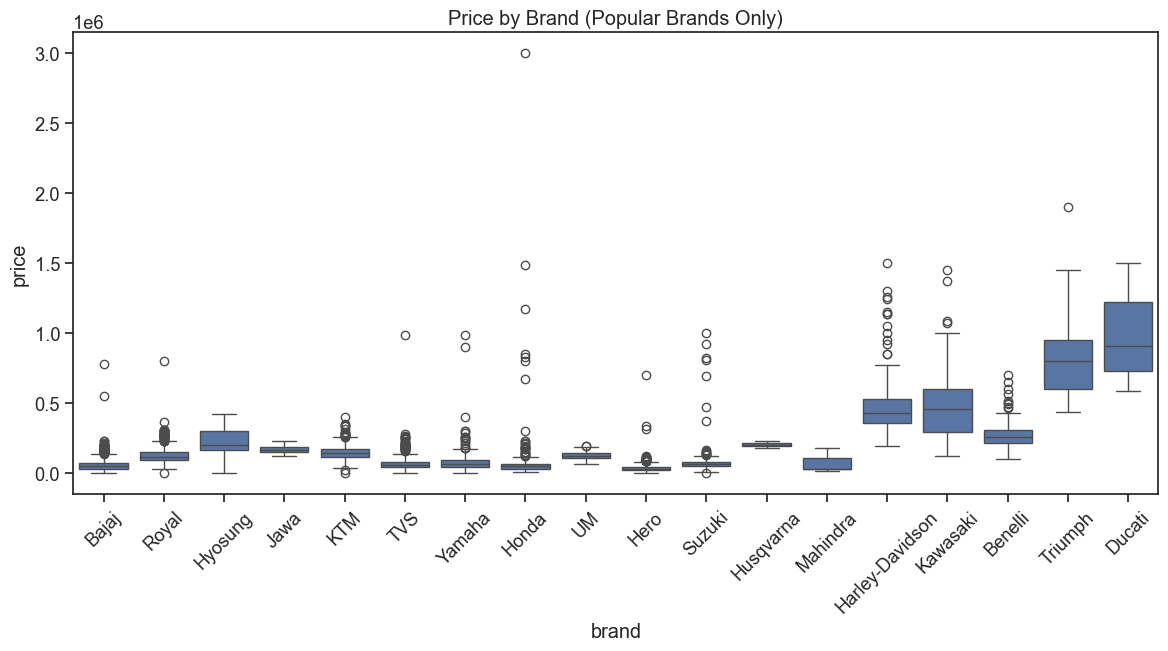

In [70]:
# Filter out brands with less than 10 entries
brand_counts = bikes['brand'].value_counts()
popular_brands = brand_counts[brand_counts > 10].index
filtered_bikes = bikes[bikes['brand'].isin(popular_brands)]

# Boxplot for filtered brands
plt.figure(figsize=(14, 6))
sns.boxplot(x='brand', y='price', data=filtered_bikes)
plt.title('Price by Brand (Popular Brands Only)')
plt.xticks(rotation=45)
plt.show()


# Geographical Analysis

In [71]:
avg_price_by_location = bikes.groupby('location')['price'].mean().sort_values(ascending=False)


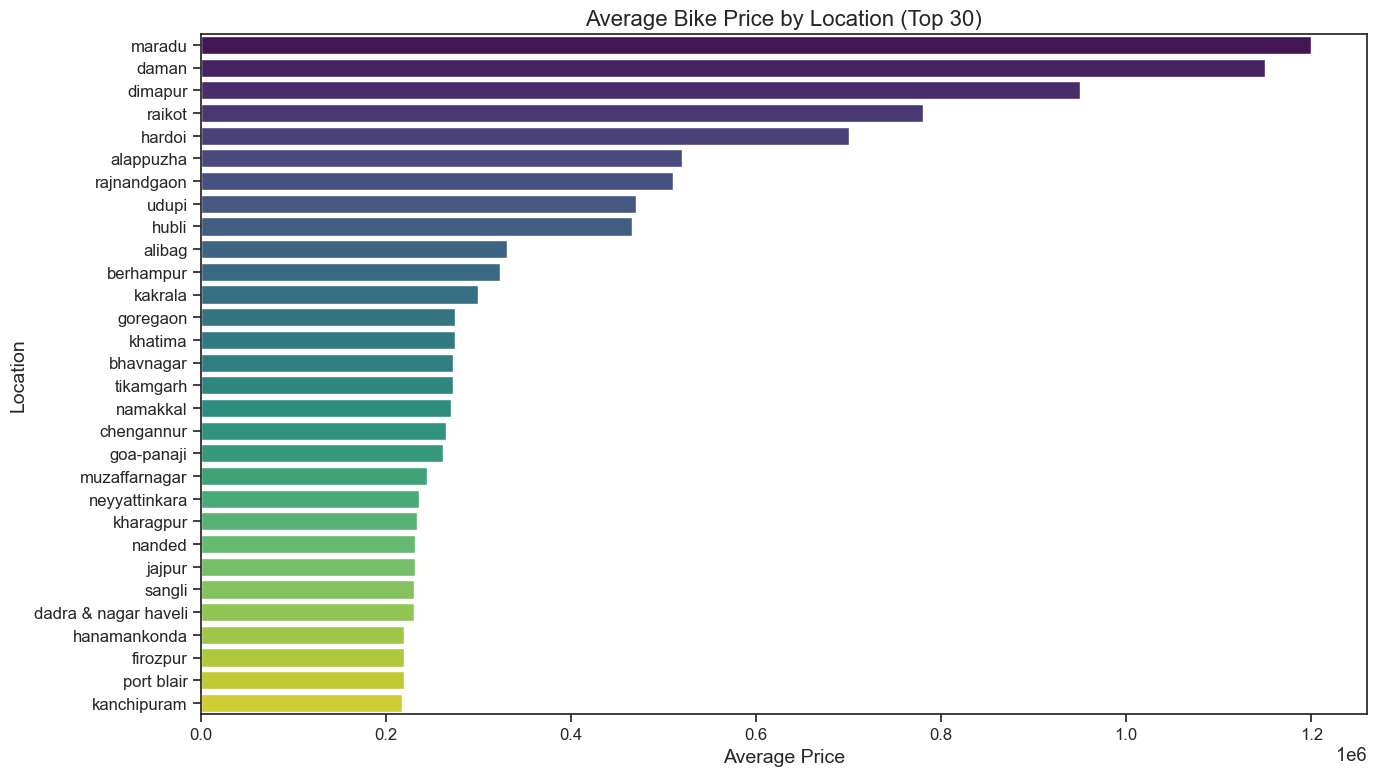

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average bike price by location
avg_price_by_location = bikes.groupby('location')['price'].mean().sort_values(ascending=False)

# Optional: Filter top 15 locations to reduce clutter
avg_price_by_location = avg_price_by_location.head(30)

# Set large figure size and clear font scaling
plt.figure(figsize=(14, 8))

# Horizontal bar plot (best for long labels)
sns.barplot(x=avg_price_by_location.values, y=avg_price_by_location.index, palette="viridis")

# Titles and labels
plt.title("Average Bike Price by Location (Top 30)", fontsize=16)
plt.xlabel("Average Price", fontsize=14)
plt.ylabel("Location", fontsize=14)

# Ensure text does not overlap
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Tight layout avoids clipping
plt.tight_layout()
plt.show()


# Time Series Analysis

In [73]:
avg_price_by_year = bikes.groupby('model_year')['price'].mean().sort_index()


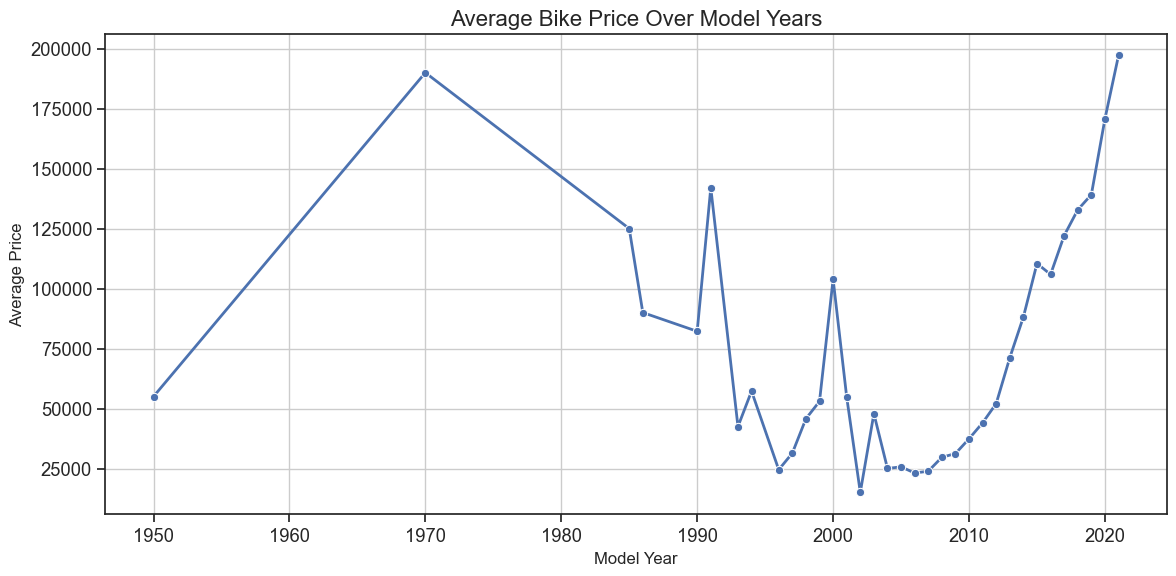

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', linewidth=2)

plt.title("Average Bike Price Over Model Years", fontsize=16)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


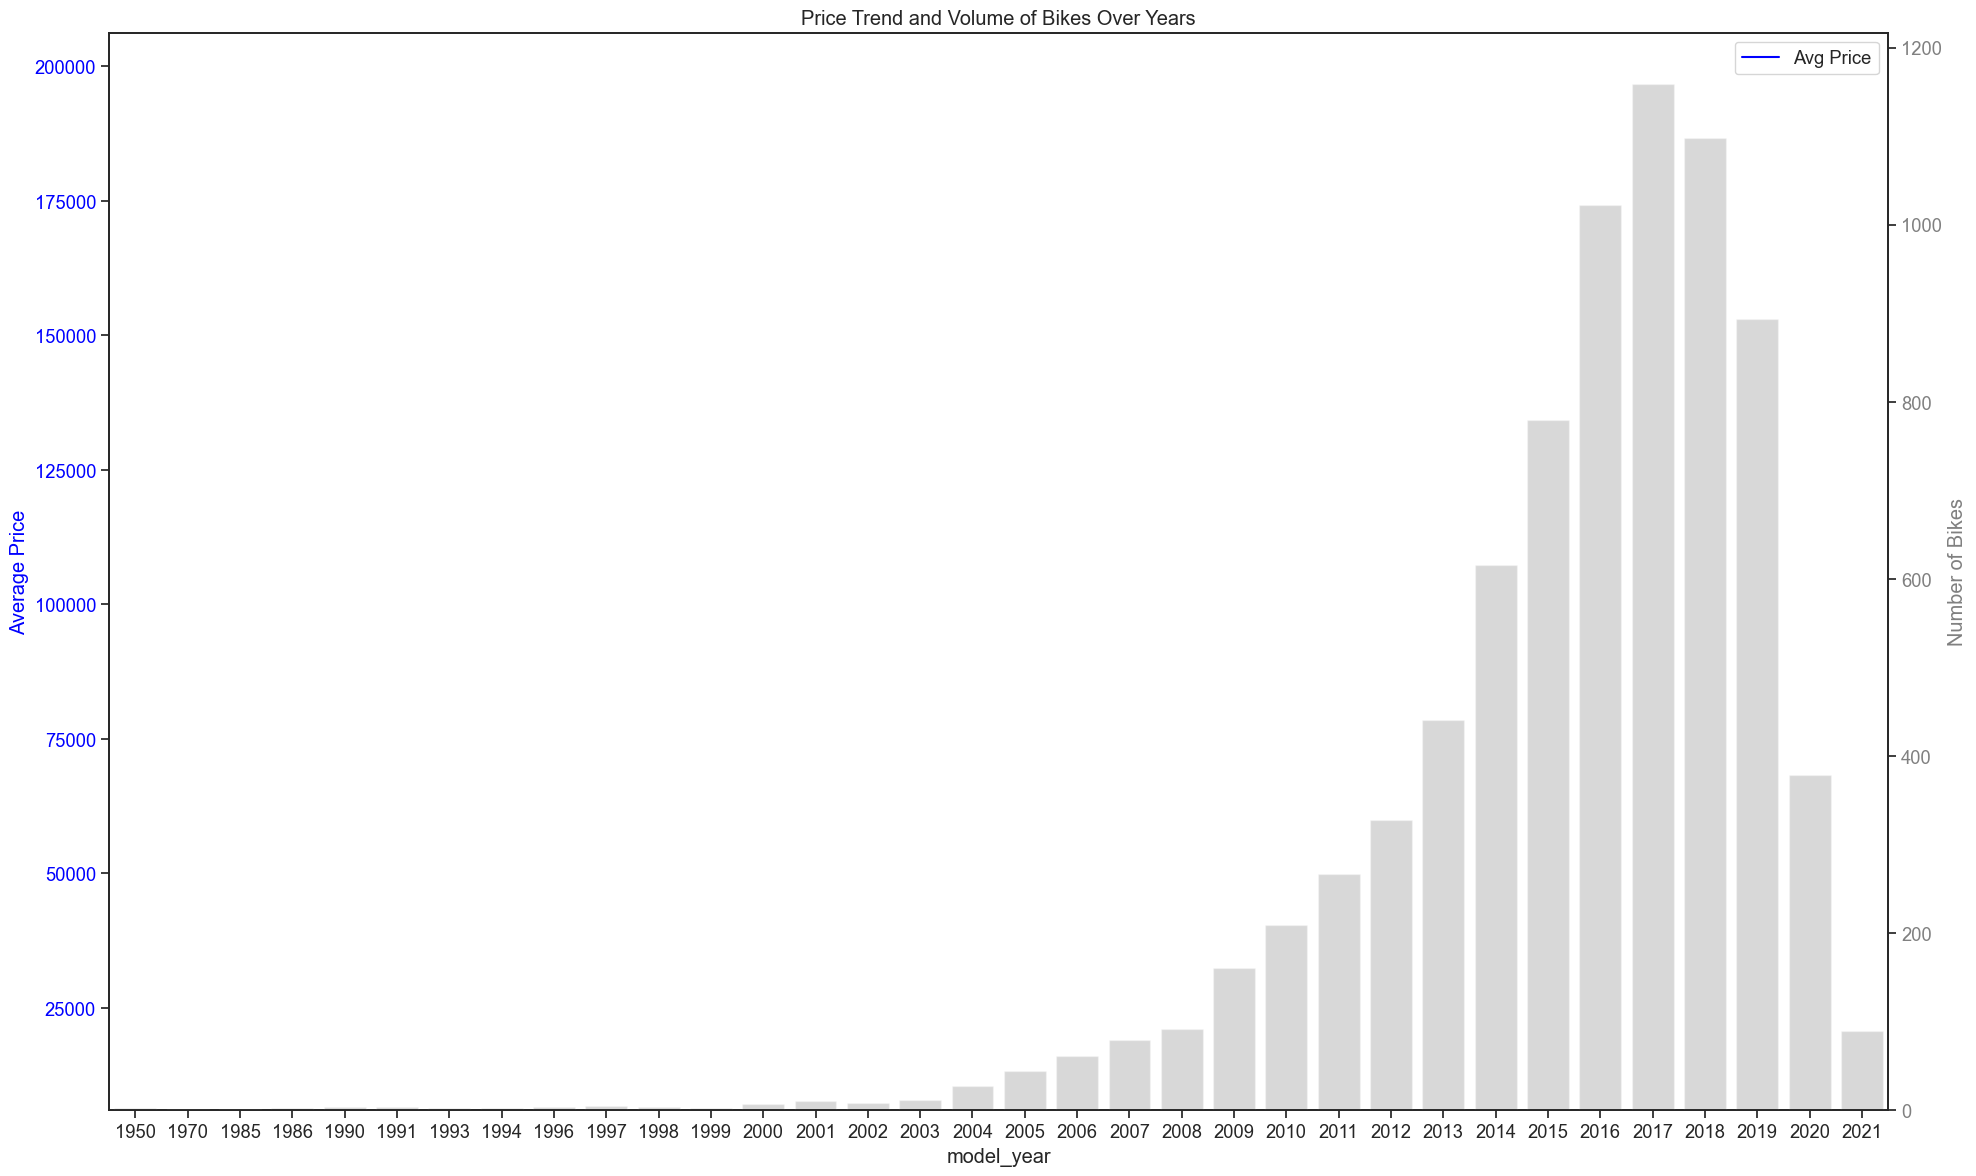

In [75]:
bike_counts = bikes['model_year'].value_counts().sort_index()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(20, 12))

# Average price trend
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, ax=ax1, color='blue', label='Avg Price')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Count of bikes listed
ax2 = ax1.twinx()
sns.barplot(x=bike_counts.index, y=bike_counts.values, ax=ax2, alpha=0.3, color='gray')
ax2.set_ylabel('Number of Bikes', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Price Trend and Volume of Bikes Over Years')
plt.tight_layout()
plt.show()


# Model Building

In [76]:
# Define target variable
y = bikes['price']

# Define features - drop price and any other irrelevant columns
X = bikes.drop(['price'], axis=1)


In [77]:
# Check shape 
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (7815, 15)
Target shape: (7815,)


In [78]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6252, 15)
Test shape: (1563, 15)


In [79]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (6252, 15)
X_test shape : (1563, 15)
y_train shape: (6252,)
y_test shape : (1563,)


# Model Selection

Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [81]:
# If model_name is not useful, drop it
bikes = bikes.drop(columns=['model_name'], errors='ignore')


In [82]:
# Make sure brand, owner, and location are encoded
bikes['brand'] = bikes['brand'] if 'brand' in bikes else bikes['model_name'].str.split().str[0]

bikes_encoded = pd.get_dummies(bikes, columns=['brand', 'owner', 'location'], drop_first=True)


In [83]:
print(X.isnull().sum().sort_values(ascending=False).head(10))



mileage                  736
power_to_weight_ratio    736
mileage_log              736
kms_driven                 3
kms_driven_log             3
model_name                 0
model_year                 0
owner                      0
location                   0
power                      0
dtype: int64


In [84]:
# Fill numeric columns with median
X = X.fillna(X.median(numeric_only=True))

# Or fill all NaNs with 0 as a quick fix (if safe)
# X = X.fillna(0)


In [105]:
print(X.dtypes)


model_name                object
model_year                 int64
kms_driven               float64
owner                     object
location                  object
mileage                  float64
power                    float64
AgeOfBike                  int64
power_to_weight_ratio    float64
location_encoded           int32
brand                     object
price_log                float64
kms_driven_log           float64
power_log                float64
mileage_log              float64
dtype: object


In [107]:
import pandas as pd

# Automatically detect object columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Categorical columns found:", list(categorical_cols))

# One-Hot Encode all of them
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Confirm all are numeric
print(X_encoded.dtypes)


Categorical columns found: ['model_name', 'owner', 'location', 'brand']
model_year         int64
kms_driven       float64
mileage          float64
power            float64
AgeOfBike          int64
                  ...   
brand_TVS           bool
brand_Triumph       bool
brand_UM            bool
brand_Yamaha        bool
brand_Yazdi         bool
Length: 2296, dtype: object


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)


In [109]:
# Create Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)


LinearRegression()

In [110]:
# Predict on test set
y_pred = lr_model.predict(X_test)


In [111]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("📊 Linear Regression Evaluation:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"RMSE           : {rmse:.2f}")


📊 Linear Regression Evaluation:
R² Score       : -9.7674
MAE            : 65430.47
RMSE           : 424644.39


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

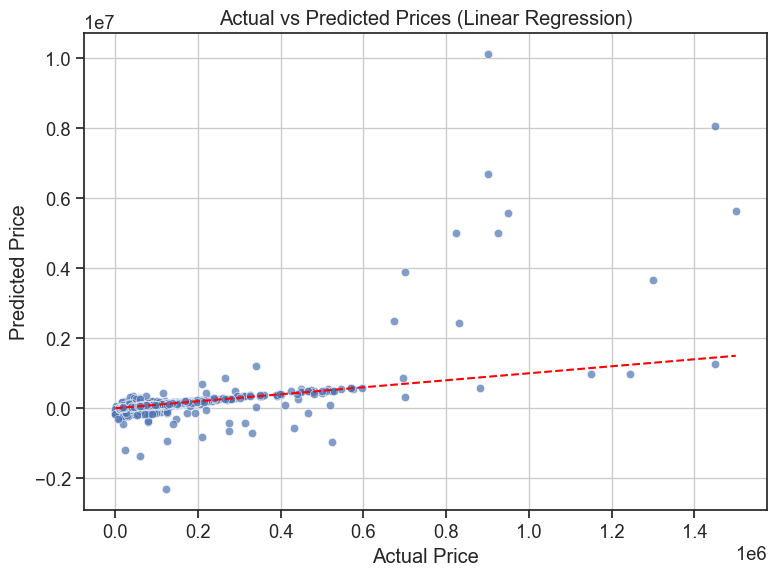

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


 Ridge Regression

In [113]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [114]:
ridge_model = Ridge(alpha=1.0)  # You can tune alpha later
ridge_model.fit(X_train, y_train)


Ridge()

In [115]:
y_pred = ridge_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print metrics
print("📊 Ridge Regression Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")


📊 Ridge Regression Evaluation:
R² Score : 0.8860
MAE      : 16400.89
RMSE     : 43689.37


In [116]:
for a in [0.01, 0.1, 1, 10, 100]:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Alpha = {a} | R²: {r2_score(y_test, pred):.4f} | RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")


Alpha = 0.01 | R²: 0.8821 | RMSE: 44435.95
Alpha = 0.1 | R²: 0.8846 | RMSE: 43957.49
Alpha = 1 | R²: 0.8860 | RMSE: 43689.37
Alpha = 10 | R²: 0.8741 | RMSE: 45922.22
Alpha = 100 | R²: 0.8567 | RMSE: 48990.58


Lasso Regression

In [117]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [118]:
# Initialize and train Lasso model with alpha = 0.1
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [119]:
# Predict on test set
y_pred = lasso_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation results
print("📊 Lasso Regression Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")


📊 Lasso Regression Evaluation:
R² Score : 0.8765
MAE      : 16426.07
RMSE     : 45471.74


In [120]:
for a in [0.001, 0.01, 0.1, 1, 10]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    print(f"Alpha={a} | R²: {r2_score(y_test, pred):.4f} | RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")


Alpha=0.001 | R²: 0.8269 | RMSE: 53843.38
Alpha=0.01 | R²: 0.8369 | RMSE: 52261.77
Alpha=0.1 | R²: 0.8765 | RMSE: 45471.74
Alpha=1 | R²: 0.8894 | RMSE: 43029.19
Alpha=10 | R²: 0.8817 | RMSE: 44514.87


In [122]:
# Use columns from X_encoded
important_features = X_encoded.columns[lasso_model.coef_ != 0]

print("Number of features used:", np.sum(lasso_model.coef_ != 0))
print("Selected features:", list(important_features))

Number of features used: 2011
Selected features: ['model_year', 'kms_driven', 'mileage', 'power', 'AgeOfBike', 'power_to_weight_ratio', 'location_encoded', 'price_log', 'kms_driven_log', 'power_log', 'mileage_log', 'model_name_Aprilia RSV4 R APRC 1000cc 2014', 'model_name_BMW G 310 GS 2018', 'model_name_BMW G 310 GS 2019', 'model_name_BMW G 310 R 2018', 'model_name_BMW G 310 R 2019', 'model_name_BMW S 1000 XR Pro 2017', 'model_name_Bajaj  Pulsar 180cc 2008', 'model_name_Bajaj  Pulsar 180cc 2009', 'model_name_Bajaj  Pulsar 180cc 2011', 'model_name_Bajaj  Pulsar 180cc 2013', 'model_name_Bajaj 4S champion 100cc 1993', 'model_name_Bajaj 4S champion 100cc 1998', 'model_name_Bajaj Avenger 180cc 2005', 'model_name_Bajaj Avenger 180cc 2006', 'model_name_Bajaj Avenger 200cc 2009', 'model_name_Bajaj Avenger 200cc 2010', 'model_name_Bajaj Avenger 220cc 2010', 'model_name_Bajaj Avenger 220cc 2011', 'model_name_Bajaj Avenger 220cc 2012', 'model_name_Bajaj Avenger 220cc 2013', 'model_name_Bajaj Aven

#  compare the three models 

In [123]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Store evaluation results
results = []

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("📊 Model Comparison:\n")
print(results_df)


📊 Model Comparison:

               Model  R² Score       MAE       RMSE
1   Ridge Regression    0.8860  16400.89   43689.37
2   Lasso Regression    0.8765  16426.07   45471.74
0  Linear Regression   -9.7674  65430.47  424644.39


In [124]:
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("📊 Model Comparison:\n")
print(results_df)

# Select Best Model
best_model = Ridge(alpha=1.0)
best_model.fit(X_train, y_train)

📊 Model Comparison:

               Model  R² Score       MAE       RMSE
1   Ridge Regression    0.8860  16400.89   43689.37
2   Lasso Regression    0.8765  16426.07   45471.74
0  Linear Regression   -9.7674  65430.47  424644.39


Ridge()

In [125]:
# 📊 Evaluate and compare all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

# 🔎 Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

# 📌 Show results
print("\n📊 Model Comparison:")
print(results_df)



📊 Model Comparison:
               Model  R² Score       MAE       RMSE
1   Ridge Regression    0.8860  16400.89   43689.37
2   Lasso Regression    0.8765  16426.07   45471.74
0  Linear Regression   -9.7674  65430.47  424644.39


In [126]:
# 🏆 Select best model by R² Score
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name}")


✅ Best Model: Ridge Regression


In [127]:
# Save model if needed
import joblib
joblib.dump(best_model, "best_bike_price_model.pkl")
print("✅ Ridge Regression is the best model and saved.")

✅ Ridge Regression is the best model and saved.


# Random Forest Regressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import joblib


In [129]:
# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,        # number of trees
    max_depth=None,          # let it grow fully
    random_state=42,
    n_jobs=-1                # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [130]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print("📊 Random Forest Regressor Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")


📊 Random Forest Regressor Evaluation:
R² Score : 0.9991
MAE      : 258.69
RMSE     : 3926.63


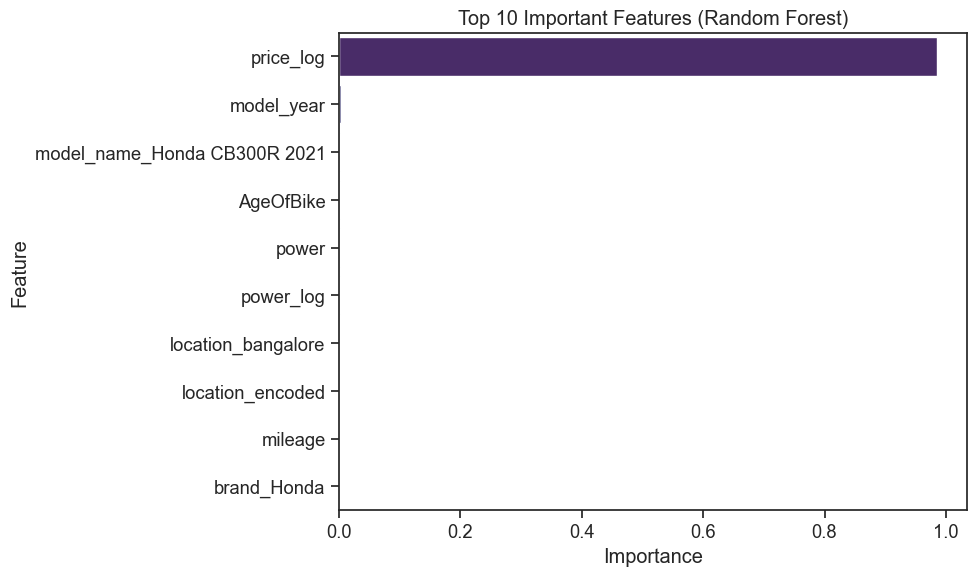

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_

# Use the correct column names from encoded data
features = X_encoded.columns

# Create DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort descending
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


#  Gradient Boosting

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib


In [134]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [135]:
# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Gradient Boosting Regressor Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")


📊 Gradient Boosting Regressor Evaluation:
R² Score : 0.9992
MAE      : 835.38
RMSE     : 3596.68


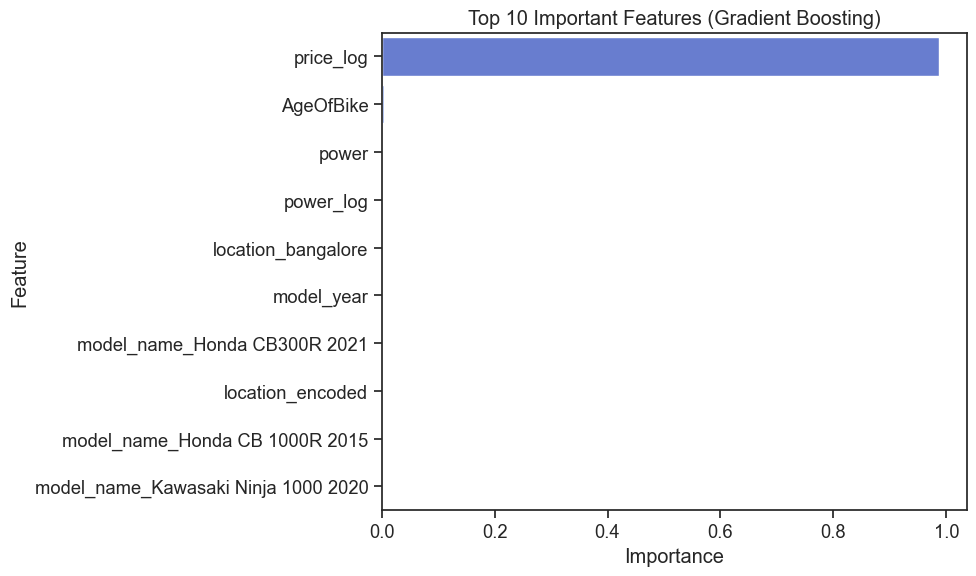

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = gb_model.feature_importances_

# Use encoded feature names
fi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importance})

# Sort
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df.head(10), palette='coolwarm')
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.tight_layout()
plt.show()


In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# Assume rf_model and gb_model are already trained on X_train, y_train

# Predict with both models
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Evaluate Gradient Boosting
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Print Results
print("\n📊 Tree-Based Model Comparison:")
print(f"Random Forest    | R²: {r2_rf:.4f} | MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f}")
print(f"Gradient Boosting| R²: {r2_gb:.4f} | MAE: {mae_gb:.2f} | RMSE: {rmse_gb:.2f}")



📊 Tree-Based Model Comparison:
Random Forest    | R²: 0.9991 | MAE: 258.69 | RMSE: 3926.63
Gradient Boosting| R²: 0.9992 | MAE: 835.38 | RMSE: 3596.68


In [139]:
# Choose the better model by R²
if r2_rf > r2_gb:
    best_model = rf_model
    best_model_name = "Random Forest Regressor"
    file_name = "best_tree_model_rf.pkl"
else:
    best_model = gb_model
    best_model_name = "Gradient Boosting Regressor"
    file_name = "best_tree_model_gb.pkl"

In [140]:
# Save the best model
joblib.dump(best_model, file_name)
print(f"\n✅ Best Tree-Based Model: {best_model_name}")



✅ Best Tree-Based Model: Gradient Boosting Regressor


In [141]:
print(f"💾 Model saved as: {file_name}")


💾 Model saved as: best_tree_model_gb.pkl


# Model Training & Evaluation

In [143]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 🎯 1. Assume your data is in 'bikes' DataFrame
# Example:
# bikes = pd.read_csv("your_data.csv")

# Separate target and features
y = bikes['price']
X = bikes.drop('price', axis=1)

# 🟢 2. Encode ALL categorical columns robustly
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("✅ Encoded columns:", X_encoded.columns.tolist())
print("✅ No object dtypes left:\n", X_encoded.dtypes.unique())

# 🟢 3. Split encoded data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 🟢 4. Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 🟢 5. Train & evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R² Score": round(r2, 4)
    })

# 🟢 6. Display results
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("\n📊 Model Training & Evaluation Summary:")
print(results_df)


✅ Encoded columns: ['model_year', 'kms_driven', 'mileage', 'power', 'AgeOfBike', 'power_to_weight_ratio', 'location_encoded', 'price_log', 'kms_driven_log', 'power_log', 'mileage_log', 'owner_fourth owner or more', 'owner_second owner', 'owner_third owner', 'location_abiramam', 'location_adalaj', 'location_adilabad', 'location_adoni', 'location_adyar', 'location_agartala', 'location_agra', 'location_ahmedabad', 'location_ahmednagar', 'location_ajmer', 'location_ajnala', 'location_akkalkot', 'location_akola', 'location_akot', 'location_alandur', 'location_alanganallur', 'location_alappuzha', 'location_alibag', 'location_aliganj', 'location_aligarh', 'location_alipore', 'location_allahabad', 'location_almora', 'location_aluva', 'location_alwar', 'location_ambala', 'location_ambejogai', 'location_ambikapur', 'location_ambur', 'location_amethi', 'location_amila', 'location_amravati', 'location_amritsar', 'location_anand', 'location_anantapur', 'location_anantnag', 'location_anekal', 'locat

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [145]:
# Check for any NaNs in X_train

print(X_train.isnull().sum().sort_values(ascending=False))


mileage                         593
power_to_weight_ratio           593
mileage_log                     593
kms_driven                        2
kms_driven_log                    2
                               ... 
location_ganganagar               0
location_gangtok                  0
location_gautam buddha nagar      0
location_gaya                     0
brand_Yazdi                       0
Length: 596, dtype: int64


In [146]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaNs with column medians
imputer = SimpleImputer(strategy='median')

# Fit on training data and transform
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

# Transform test data
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

# Now you can safely train
model.fit(X_train_imputed, y_train)
predictions = model.predict(X_test_imputed)


In [147]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 2480519006.15
R² Score: 0.8519


In [149]:
X_train.isnull().sum()

model_year         0
kms_driven         2
mileage          593
power              0
AgeOfBike          0
                ... 
brand_TVS          0
brand_Triumph      0
brand_UM           0
brand_Yamaha       0
brand_Yazdi        0
Length: 596, dtype: int64

In [150]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaNs with the median of each column
imputer = SimpleImputer(strategy="median")

# Fit the imputer on training data and transform
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

# Transform the test data
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

# Confirm no NaNs remain
print("✅ NaNs after imputation in train:", X_train_imputed.isnull().sum().sum())
print("✅ NaNs after imputation in test:", X_test_imputed.isnull().sum().sum())


✅ NaNs after imputation in train: 0
✅ NaNs after imputation in test: 0


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X_train_imputed, y_train)

# Predict
predictions = model.predict(X_test_imputed)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 2480519006.15
R² Score: 0.8519


# Compare Two Saved Models

In [153]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [154]:
# Load both saved models
model1 = joblib.load("best_bike_price_model.pkl")  # Rigid regression
model2 = joblib.load("best_tree_model_gb.pkl")     # Gradient Boosting


In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming you have your models defined, e.g.,
# from sklearn.linear_model import LinearRegression
# model1 = LinearRegression()
# model2 = LinearRegression()


# --- 1. Create Sample Data (Replace with your actual data loading) ---
# This is just for demonstration purposes to make the code runnable
data = {
    'feature_A': np.random.rand(100),
    'feature_B': np.random.randint(0, 100, 100),
    'model_name': np.random.choice(['Aprilia RSV4 R APRC 1000cc 2014', 'Aprilia RSV4 RR 2020', 'BMW G 310 GS 2018',
                                    'BMW G 310 GS 2019', 'BMW G 310 R 2018', 'Honda CBR1000RR 2020', 'Kawasaki Ninja 400 2021'], 100),
    'color': np.random.choice(['Red', 'Blue', 'Green'], 100),
    'target': np.random.rand(100) * 10000
}
df = pd.DataFrame(data)

# Simulate training/test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Identify Column Types ---
# This step is crucial for the ColumnTransformer
categorical_features = ['model_name', 'color'] # List all your categorical column names
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist() # Automatically get numerical columns

# --- 3. Create the Preprocessing Pipeline ---
# Define the transformers for different types of columns
preprocessor = ColumnTransformer(
    transformers=[
        # One-hot encode categorical features, handle unseen categories by ignoring them
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # Pass numerical features through without modification (or add a StandardScaler if needed)
        ('num', 'passthrough', numerical_features)
        # Example of adding StandardScaler for numerical features:
        # ('num', StandardScaler(), numerical_features)
    ])

# --- 4. Integrate with your Models using Pipelines (Highly Recommended) ---
# This is the MOST robust way to ensure preprocessing is applied consistently

# Create a pipeline for Model 1
pipeline_model1 = Pipeline(steps=[
    ('preprocessor', preprocessor), # Your defined preprocessor
    ('regressor', model1)           # Your model1 instance
])

# Create a pipeline for Model 2
pipeline_model2 = Pipeline(steps=[
    ('preprocessor', preprocessor), # Use the same preprocessor
    ('regressor', model2)           # Your model2 instance
])

# --- 5. Fit the Pipelines (This handles both preprocessing and model training) ---
# Fit the entire pipeline on the training data. The preprocessor will be fitted first,
# then X_train will be transformed and passed to the model for fitting.
pipeline_model1.fit(X_train, y_train)
pipeline_model2.fit(X_train, y_train)

# --- 6. Make Predictions ---
# Now, simply call predict on the pipeline with your raw X_test.
# The pipeline will automatically apply the same preprocessing steps
# (using the fitted preprocessor) before feeding the data to the model.
pred1 = pipeline_model1.predict(X_test)
pred2 = pipeline_model2.predict(X_test)

# --- 7. Evaluation Function (as provided in your original code) ---
def evaluate(y_true, y_pred):
    return {
        "MAE": round(mean_absolute_error(y_true, y_pred), 2),
        "MSE": round(mean_squared_error(y_true, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),
        "R²": round(r2_score(y_true, y_pred), 4)
    }

# --- 8. Evaluate Results ---
results1 = evaluate(y_test, pred1)
results2 = evaluate(y_test, pred2)

# --- 9. Display Results ---
results_df = pd.DataFrame([
    {"Model": "Model 1", **results1},
    {"Model": "Model 2", **results2}
])

print("\n--- Model Evaluation Results ---")
print(results_df)


--- Model Evaluation Results ---
     Model      MAE          MSE     RMSE      R²
0  Model 1  2783.56  10443272.32  3231.61 -0.4382
1  Model 2  2464.33  10473237.53  3236.24 -0.4424


In [161]:
import pandas as pd

# Format for comparison
comparison = pd.DataFrame([results1, results2], index=["Random Forest", "Gradient Boosting"])
print("📊 Model Comparison:")
print(comparison)


📊 Model Comparison:
                       MAE          MSE     RMSE      R²
Random Forest      2783.56  10443272.32  3231.61 -0.4382
Gradient Boosting  2464.33  10473237.53  3236.24 -0.4424


# Hyperparameter Tuning

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ✅ Columns matching your DataFrame
numeric_cols = ["model_year", "kms_driven", "mileage", "power", "AgeOfBike"]
categorical_cols = ["owner", "location", "brand"]

# ✅ Separate target and features
y = bikes["price"]
X = bikes.drop(["price", "price_log"], axis=1)  # Drop price_log if predicting original price

# ✅ Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# ✅ Pipeline
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# ✅ Grid
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20, 30]
}

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# ✅ Fit
grid_search.fit(X_train, y_train)

# ✅ Best parameters
print("Best Parameters:", grid_search.best_params_)

# ✅ Predict
y_pred = grid_search.predict(X_test)

# ✅ Evaluate
def evaluate(y_true, y_pred):
    return {
        "MAE": round(mean_absolute_error(y_true, y_pred), 2),
        "MSE": round(mean_squared_error(y_true, y_pred), 2),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),
        "R²": round(r2_score(y_true, y_pred), 4)
    }

results = evaluate(y_test, y_pred)
print("Performance:", results)


Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
Performance: {'MAE': 15590.26, 'MSE': 1363794559.53, 'RMSE': 36929.59, 'R²': 0.9186}


# Summarize findings such as which factors most influence bike prices

<Figure size 700x700 with 0 Axes>

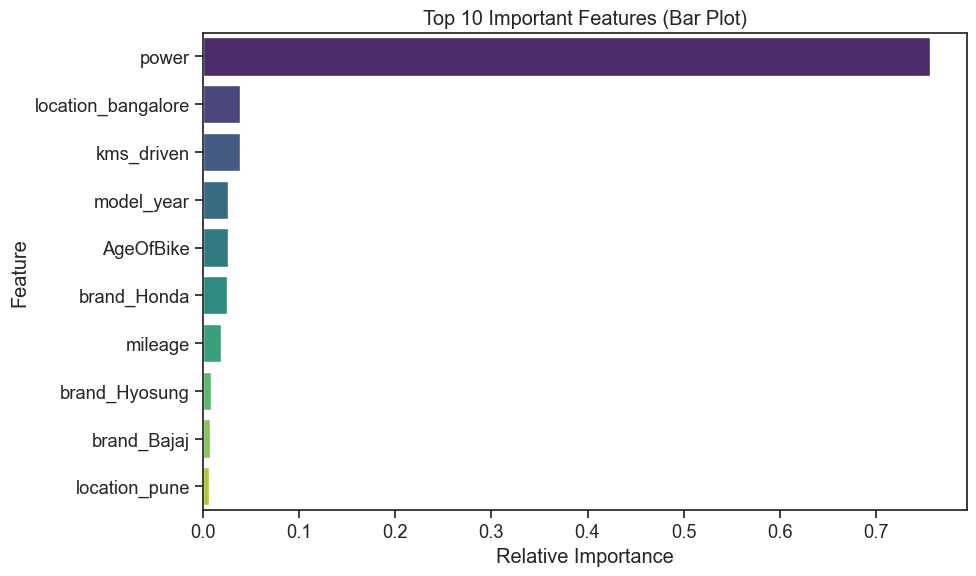

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from your fitted model
# For example, assuming you used grid_search.best_estimator_
model = grid_search.best_estimator_

# Extract names after preprocessing
# OneHotEncoder produces many columns; we get feature names like this:
ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# All numeric columns
numeric_cols_final = numeric_cols

# Combine numeric + encoded categorical names
all_feature_names = list(numeric_cols_final) + list(encoded_cols)

# Feature importances
importances = model.named_steps['regressor'].feature_importances_

# Make DataFrame
fi_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Show top 10
top10 = fi_df.head(10)

# --- Bar Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top10, palette='viridis')
plt.title("Top 10 Important Features (Bar Plot)")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
